PCA busca encontrar una proyección de los datos que genere una mayor varianza

Para eso debemos recudir las dimensiones de nuestros datos, ej: si tenemos una variable x1 y x2 en R2 debemos llevarlas a R1, sin perder la consistencia.

Para esto sticklearn ya nos proporciona maneras directas de realizar dicho prodecimiento, sin embargo realizarlo manualmente en este caso involucra operaciones de algébra y estadística, por lo que no este demás hacer primero un análisis manual valiendonos de un tutorial y luego usar la libreria sticklearn.

El vídeo introductorio al tema que utilicé fue el siguiente: [click aquí](https://www.youtube.com/watch?v=x-7BHjMA15M)

In [1]:
import pandas as pd # Para procesamiento de datos
import matplotlib.pyplot as plt # Para gráficar 
from sklearn.preprocessing import StandardScaler # Para normalizar los datos
from numpy.linalg import eig # Para los autovalores y autovectores


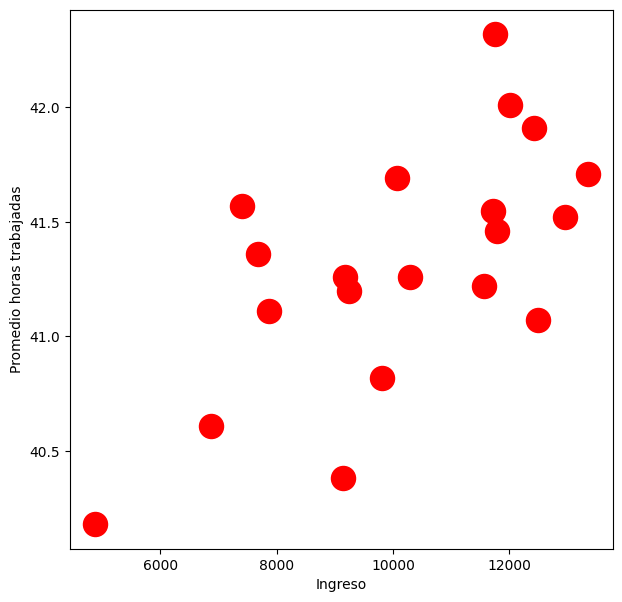

In [2]:
datos = {"ingreso" : [9136.81, 11709.94, 12416.79, 4875.73, 10065.03,
                      11755.33, 7401.78, 10291.38, 12002.42, 11787.76,
                      13347.65, 7676.76, 9808.56, 11556.47, 7875.49,
                      12486.19, 9242.40, 6867.09, 12946.25, 9167.36],

         "horas_trabajadas" : [40.38, 41.55, 41.91, 40.18, 41.69,
                               42.32, 41.57, 41.26, 42.01, 41.46,
                               41.71, 41.36, 40.82, 41.22, 41.11,
                               41.07, 41.20, 40.61, 41.52, 41.26]}


datos = pd.DataFrame(datos)
fig = plt.figure(figsize=(7,7))
plt.scatter(datos["ingreso"], datos["horas_trabajadas"], s=300, color="red")
plt.xlabel("Ingreso")
plt.ylabel("Promedio horas trabajadas")
plt.show()


# Normalización de datos
Ahora bien, al tener ingresos altos y buscar reducir la dimensión debemos normalizar los datos.

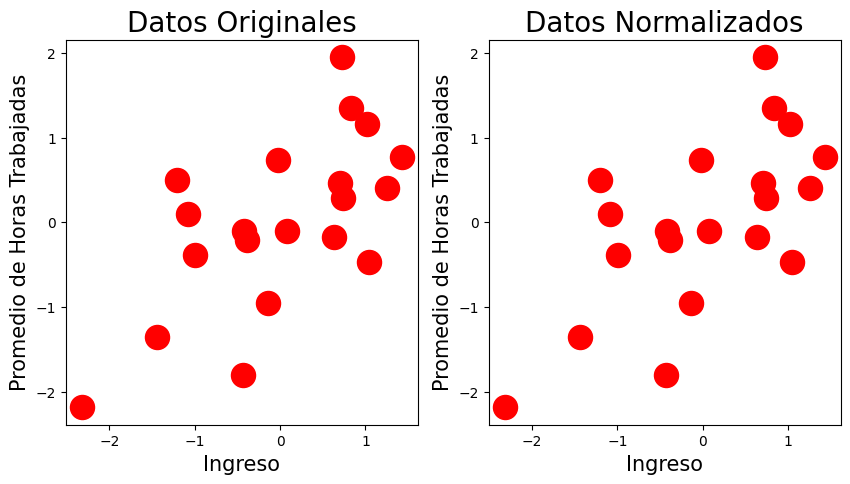

In [3]:
# Normalizo datos:
datos = pd.DataFrame(StandardScaler().fit_transform(datos),
                     columns=["ingreso", "horas_trabajadas"])

# Gráfico vs gráfico normalizado
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title("Datos Originales", fontsize=20)
ax1.scatter(datos["ingreso"], datos["horas_trabajadas"],
            s=300, color="red")
ax1.set_xlabel("Ingreso", fontsize=15)
ax1.set_ylabel("Promedio de Horas Trabajadas", fontsize=15)

ax2.set_title("Datos Normalizados", fontsize=20)
ax2.scatter(datos["ingreso"], datos["horas_trabajadas"],
           s=300, color="red")
ax2.set_xlabel("Ingreso", fontsize=15)
ax2.set_ylabel("Promedio de Horas Trabajadas", fontsize=15)

plt.show()

# Seguimos con la matriz de covarianza
Dado que PCA trabaja con covarianza, necesitamos la matriz de varianzas y covarianzas para luego trabajar con los autovalores y autovectores

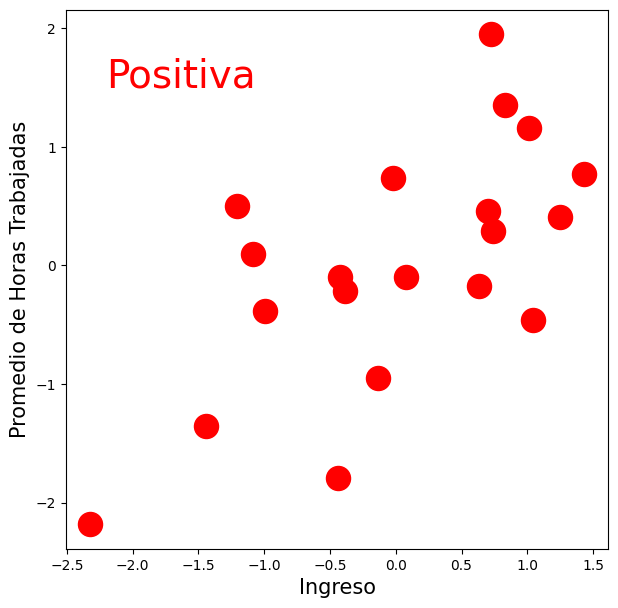

                   ingreso  horas_trabajadas
ingreso           1.052632          0.682360
horas_trabajadas  0.682360          1.052632


In [4]:
plt.figure(figsize=(7, 7))
plt.scatter(datos["ingreso"], datos["horas_trabajadas"],
           s=300, color="red")
plt.xlabel("Ingreso", fontsize=15)
plt.ylabel("Promedio de Horas Trabajadas", fontsize=15)
plt.text(-2.2, 1.5, "Positiva", fontsize=28, color="red")
plt.show()

print(datos.cov()) # pandas ya nos ofrece una función para realizar la matriz de covarianzas, una cosa de locos

# Autovalores y autovectores
Para los autovalores y autovectores numpy nos ofrece una función también, simplificando un trabajo insoportable.

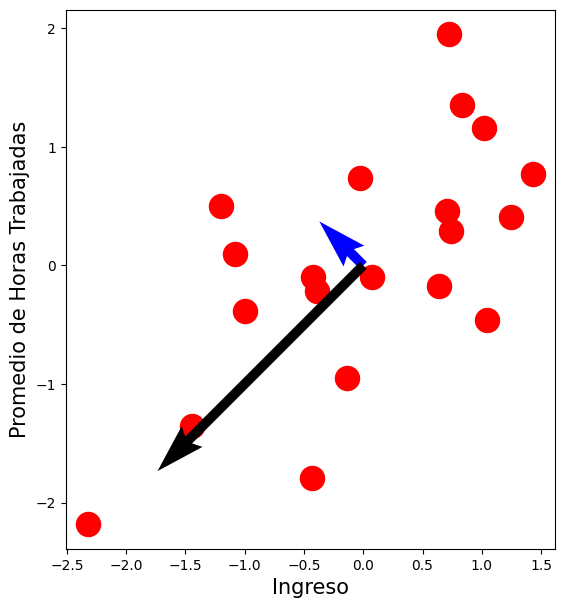

In [5]:
valores, vectores = eig(datos.cov()) # vectores y valores serán listas

vector_azul = vectores[:, 0]
vector_negro = vectores[:, 1]

plt.figure(figsize=(7, 7))
plt.axes().set_aspect("equal")

plt.scatter(datos["ingreso"], datos["horas_trabajadas"], s=300, color="red")
plt.quiver(0, 0, vector_azul[0]/abs(vector_azul[0])*valores[0],
           vector_azul[1]/abs(vector_azul[1])*valores[0],
           color="blue", angles="xy", scale_units="xy", scale=1, width=0.02)
plt.quiver(0, 0,
           vector_negro[0]/abs(vector_negro[0])*valores[1],
           vector_negro[1]/abs(vector_negro[1])*valores[1],
           color="black", angles="xy", scale_units="xy", scale=1, width=0.02)

plt.xlabel("Ingreso", fontsize=15)
plt.ylabel("Promedio de Horas Trabajadas", fontsize=15)
plt.show()

# Proyectar los datos en R1.

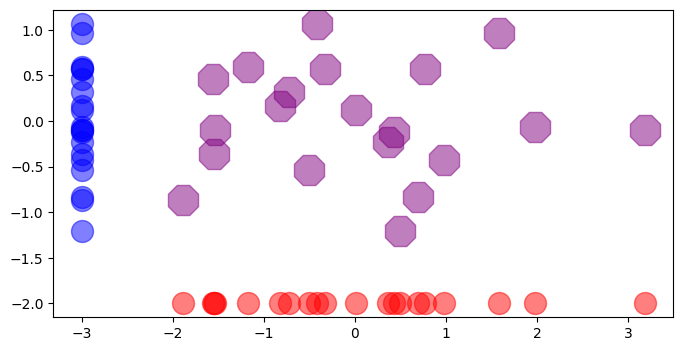

In [6]:
proyectados = pd.DataFrame(datos.values @ vectores.T,
                          columns=["ingreso", "horas_trabajadas"])

plt.figure(figsize=(8, 8))
plt.axes().set_aspect("equal")

# Es super interesante ver como hay tanta cantidad de puntos violetas como relaciones entre los rojos y azules
plt.scatter(proyectados["ingreso"], proyectados["horas_trabajadas"],
            marker="8", s=550, color="purple", alpha=0.5)

# Proyección de los datos en 1 dimensión, la verdad que acá copie y pegue código no entiendo bien que hizo
plt.scatter(proyectados["ingreso"], [-2]*len(proyectados["ingreso"]),
            s=250, color="red", alpha=0.5)

plt.scatter([-3]*len(proyectados["horas_trabajadas"]), proyectados["horas_trabajadas"],
            s=250, color="blue", alpha=0.5)
plt.show()

# Con nuestra bella y querida sklearn :)


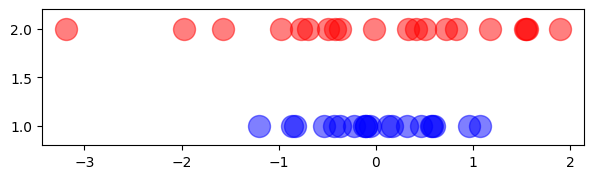

Varianza explicada por cada componente: [1.73499143 0.37027172]
Proporción de varianza explicada por cada componente: [0.82412093 0.17587907]


In [7]:
from sklearn.decomposition import PCA

# Creamos nuestro objeto PCA:
pca = PCA()
datos = pca.fit_transform(datos)

# Creamos la figura
plt.figure(figsize=(7, 7))
plt.axes().set_aspect("equal")
plt.scatter(datos[:, 0], [2]*datos[:, 0].size, s=250, color="red", alpha=0.5)
plt.scatter(datos[:, 1], [1]*datos[:, 1].size, s=250, color="blue", alpha=0.5)
plt.ylim((0.8, 2.2))
plt.show()

# Algunos datos que podemos sacar con nuestro objeto PCA instanciado
print("Varianza explicada por cada componente:", pca.explained_variance_)
print("Proporción de varianza explicada por cada componente:", pca.explained_variance_ratio_)